In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df = pd.read_csv('marketing_data.csv')

# Data Audit

In [3]:
# Data preparation

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.shape

(2240, 28)

In [7]:
df.isna() .sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df.describe() .round()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,...,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,1969.0,0.0,1.0,49.0,304.0,26.0,167.0,38.0,27.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3247.0,12.0,1.0,1.0,29.0,337.0,40.0,226.0,55.0,41.0,...,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2828.0,1959.0,0.0,0.0,24.0,24.0,1.0,16.0,3.0,1.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5458.0,1970.0,0.0,0.0,49.0,174.0,8.0,67.0,12.0,8.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8428.0,1977.0,1.0,1.0,74.0,504.0,33.0,232.0,50.0,33.0,...,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11191.0,1996.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,263.0,...,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Feature Engineering

In [9]:
# Transforming Income data

df.columns = df.columns.str.replace(' ', '')
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)

In [10]:
#transforming date

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['year'] = df['Dt_Customer'].apply(lambda x: x.strftime('%Y'))
df['month'] = df['Dt_Customer'].apply(lambda x: x.strftime('%m'))

#transofrming kidhome and teenhome to total_kids
df['total_kids'] = df['Kidhome'] + df['Teenhome']

# Transforming Total Spending
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['total_spending'] = df[mnt_cols].sum(axis=1) 

# Transoforming Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['total_purchases'] = df[purchases_cols].sum(axis=1)

# Transforming Total Campaigns Accepted
campaigns_col =[col for col in df.columns if 'Cmp' in col]
df['total_campaignsacc'] = df[campaigns_col].sum(axis=1)

# Transofrming Age
import datetime
year = datetime.datetime.today().year
df['Age'] = year - df['Year_Birth']

# Transforming Age Group
bins = [18,40,60,90]
labels = ['Adult', 'Middle Age', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_group'] = df['Age_group'].astype('object')

In [11]:
# check the transforming data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,year,month,total_kids,total_spending,total_purchases,total_campaignsacc,Age,Age_group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,SP,2014,06,0,1190,15,0,52,Middle Age
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,CA,2014,06,0,577,18,1,61,Senior
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,US,2014,05,1,251,11,0,64,Senior
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,AUS,2014,05,2,11,4,0,55,Middle Age
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,SP,2014,04,1,91,8,1,33,Adult


# Data Cleaning

In [12]:
# groupped the numeric data

numeric_data = df.select_dtypes(include=['int64', 'float64'])
numeric_data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'total_kids',
       'total_spending', 'total_purchases', 'total_campaignsacc', 'Age'],
      dtype='object')

Text(0.5, 0, 'Attributes')

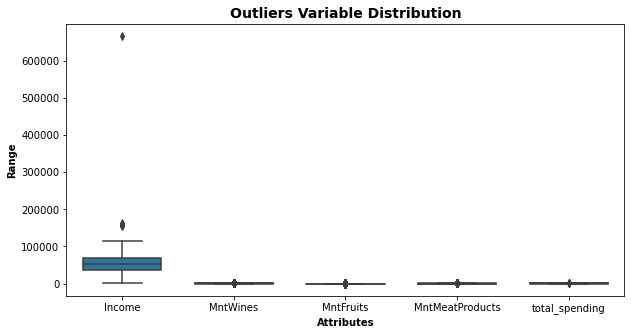

In [13]:
#finding the outliers
attributes = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'total_spending']
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(data = numeric_data[attributes],width = 0.7 )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

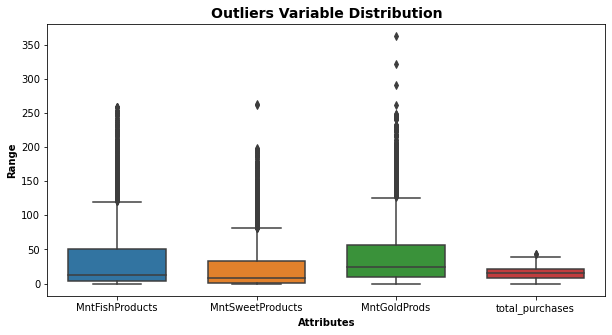

In [14]:
attributes = ['MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'total_purchases']
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(data = numeric_data[attributes],width = 0.7 )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [15]:
# Removing outliers from Income Variable

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

filter_min = df['Income']<boxplot_min
filter_max = df['Income']>boxplot_max

df_non_outlier = df[~(filter_min|filter_max)]

In [16]:
# Removing outliers from MntSweetProducts
Q1 = df['MntSweetProducts'].quantile(0.25)
Q3 = df['MntSweetProducts'].quantile(0.75)

IQR = Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

filter_min = df['MntSweetProducts']<boxplot_min
filter_max = df['MntSweetProducts']>boxplot_max

df_non_outlier = df[~(filter_min|filter_max)]

In [17]:
# Removing outliers from MntGoldProds
Q1 = df['MntGoldProds'].quantile(0.25)
Q3 = df['MntGoldProds'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

filter_min = df['MntGoldProds']<boxplot_min
filter_max = df['MntGoldProds']>boxplot_max

df_non_outlier = df[~(filter_min|filter_max)]

# Exploratory Data Analysis (EDA)

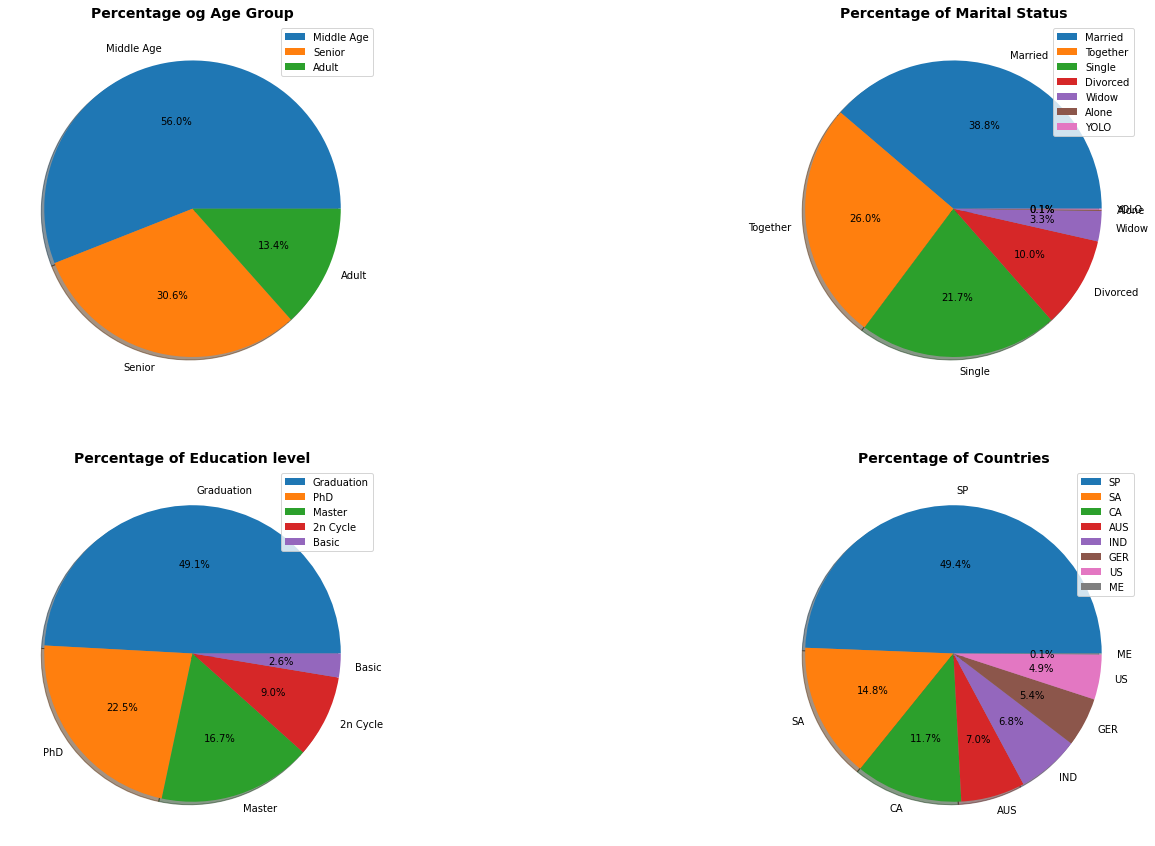

In [18]:
# Percentage of Age Group, Marital Status, Education, and Countries

fig, ax=plt.subplots(2,2,figsize=(25,15))
df_non_outlier['Age_group'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,legend=True)
ax[0][0].set_title('Percentage og Age Group',fontsize = 14, fontweight ="bold") 
ax[0][0].set_ylabel('')
df_non_outlier['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,legend=True)
ax[0][1].set_title('Percentage of Marital Status',fontsize = 14, fontweight ="bold") 
ax[0][1].set_ylabel('')
df_non_outlier['Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][0],shadow=True,legend=True)
ax[1][0].set_title('Percentage of Education level',fontsize = 14, fontweight ="bold") 
ax[1][0].set_ylabel('')
df_non_outlier['Country'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,legend=True)
ax[1][1].set_title('Percentage of Countries',fontsize = 14, fontweight ="bold") 
ax[1][1].set_ylabel('');

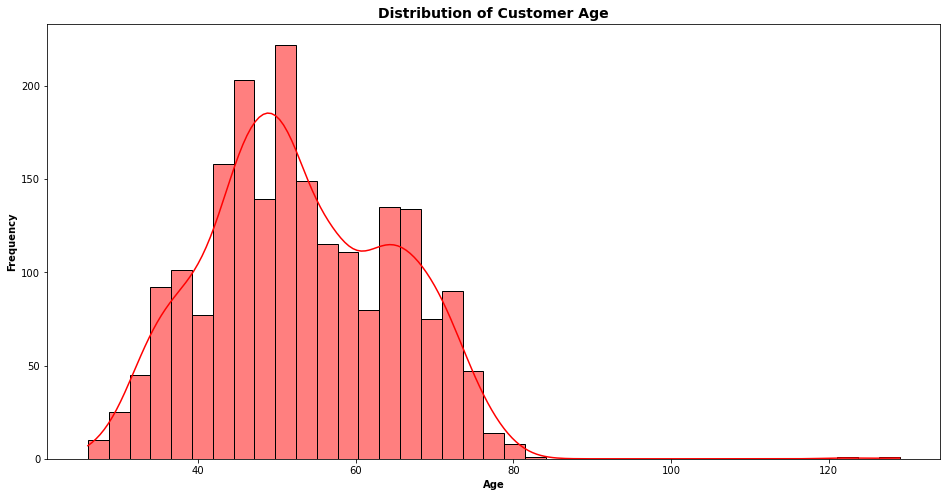

In [19]:
# Age Distribution

plt.figure(figsize=(16,8))
sns.histplot( data = df_non_outlier['Age'], kde= True, color='Red')
plt.title('Distribution of Customer Age', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontweight = "bold")
plt.xlabel('Age', fontweight = "bold");

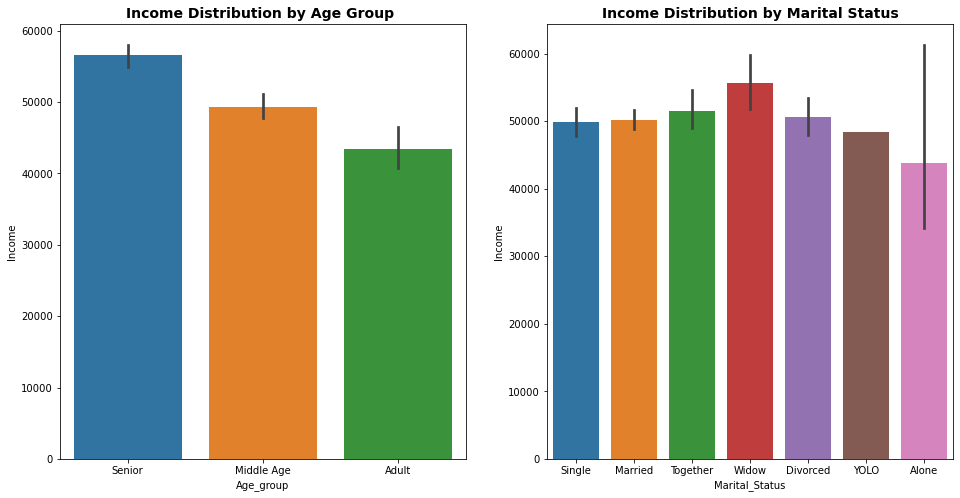

In [20]:
# Income Distribution by Age Group and Marital Status

fig, ax=plt.subplots(1,2,figsize=(16,8))
sns.barplot(x='Age_group', y='Income', data=df_non_outlier, ax=ax[0]);
ax[0].set_title('Income Distribution by Age Group ', fontsize = 14, fontweight = 'bold')
sns.barplot(x='Marital_Status', y='Income', data=df_non_outlier, ax=ax[1]);
ax[1].set_title('Income Distribution by Marital Status', fontsize = 14, fontweight = 'bold');

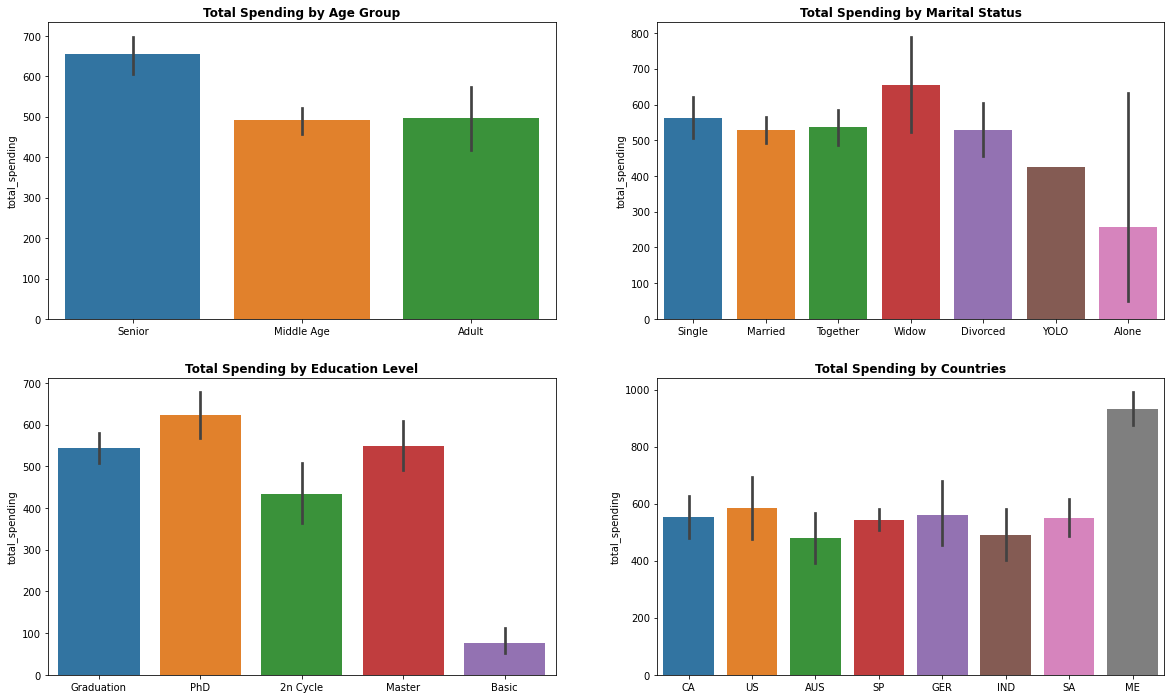

In [21]:
# Total Spending By Age Group, Marital Status, Education, and Countries

fig, ax= plt.subplots(2,2,figsize=(20,12))
sns.barplot(x='Age_group', y='total_spending', data=df_non_outlier, ax=ax[0][0]);
ax[0][0].set_title('Total Spending by Age Group', fontsize = 12, fontweight = 'bold')
ax[0][0].set_xlabel('')
sns.barplot(x='Marital_Status', y='total_spending', data=df_non_outlier, ax=ax[0][1]);
ax[0][1].set_title('Total Spending by Marital Status', fontsize = 12, fontweight = 'bold')
ax[0][1].set_xlabel('')
sns.barplot(x='Education', y='total_spending', data=df_non_outlier, ax=ax[1][0]);
ax[1][0].set_title('Total Spending by Education Level', fontsize = 12, fontweight = 'bold')
ax[1][0].set_xlabel('')
sns.barplot(x='Country', y='total_spending', data=df_non_outlier, ax=ax[1][1]);
ax[1][1].set_title('Total Spending by Countries', fontsize = 12, fontweight = 'bold')
ax[1][1].set_xlabel('');

Text(0, 0.5, 'Amount of spent')

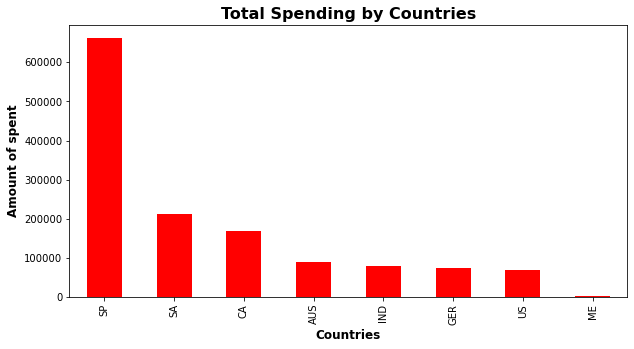

In [22]:
# Total Spending by Countries
plt.figure(figsize=(10,5))
df.groupby('Country')['total_spending'].sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Total Spending by Countries', size=16, weight="bold")
plt.xlabel('Countries', size=12, weight ="bold")
plt.ylabel('Amount of spent', size=12, weight="bold")

Text(0, 0.5, 'Number of purchases')

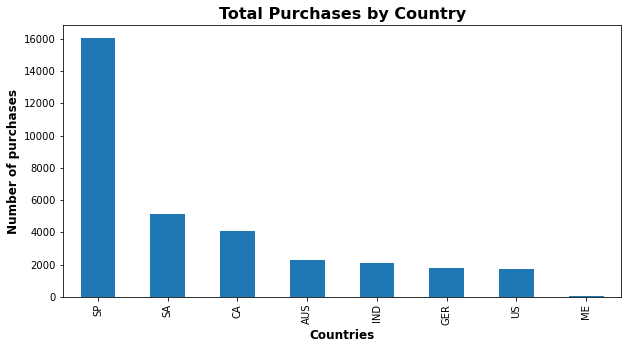

In [23]:
# Total Purchases by Countries

plt.figure(figsize=(10,5))
df.groupby('Country')['total_purchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Purchases by Country', size=16, weight="bold")
plt.xlabel('Countries', size=12, weight ="bold")
plt.ylabel('Number of purchases', size=12, weight="bold")

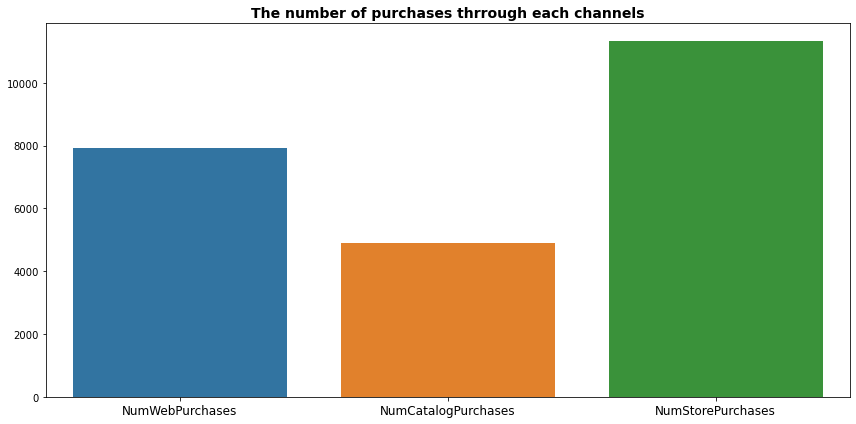

In [32]:
# The number of purchases thrrough each channels

channels = ['NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases']
channels_data = df_non_outlier[channels].sum()
plt.figure(figsize=(12,6))
plt.title('The number of purchases thrrough each channels', 
          fontsize = 14, fontweight = 'bold')
x=sns.barplot(x=channels,y=channels_data)
x.set_xticklabels(channels,size=12)
plt.tight_layout()

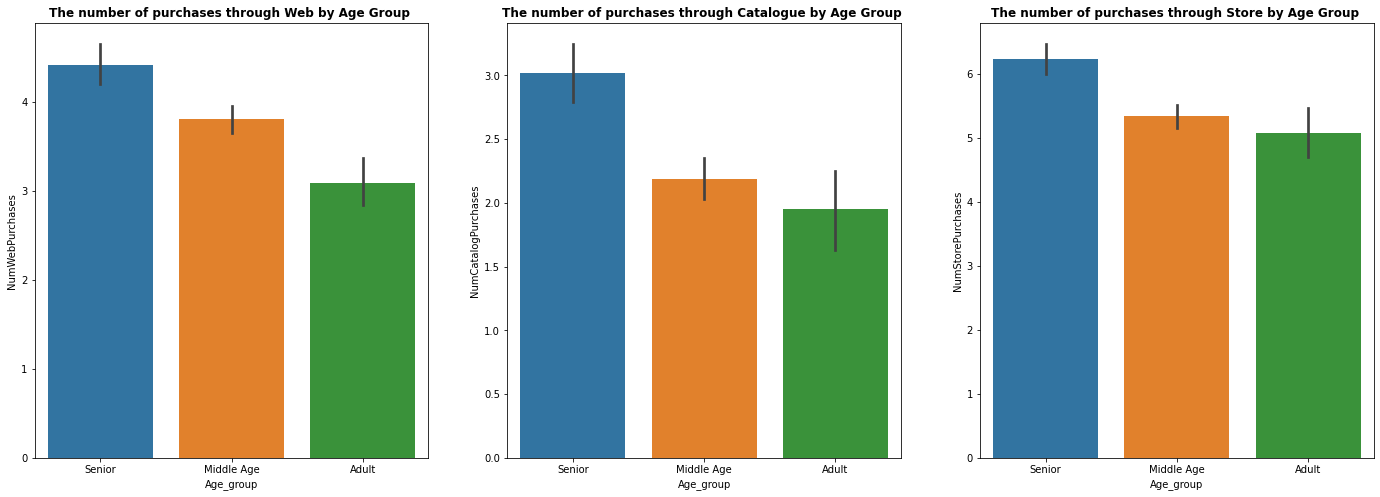

In [25]:
# Purchases through each channels by Age Group

fig, ax=plt.subplots(1,3,figsize=(24,8))
sns.barplot(x='Age_group', y='NumWebPurchases', data=df_non_outlier, ax=ax[0]);
ax[0].set_title('The number of purchases through Web by Age Group ', fontsize = 12, fontweight = 'bold')
sns.barplot(x='Age_group', y='NumCatalogPurchases', data=df_non_outlier, ax=ax[1]);
ax[1].set_title('The number of purchases through Catalogue by Age Group ', fontsize = 12, fontweight = 'bold')
sns.barplot(x='Age_group', y='NumStorePurchases', data=df_non_outlier, ax=ax[2]);
ax[2].set_title('The number of purchases through Store by Age Group ', fontsize = 12, fontweight = 'bold');

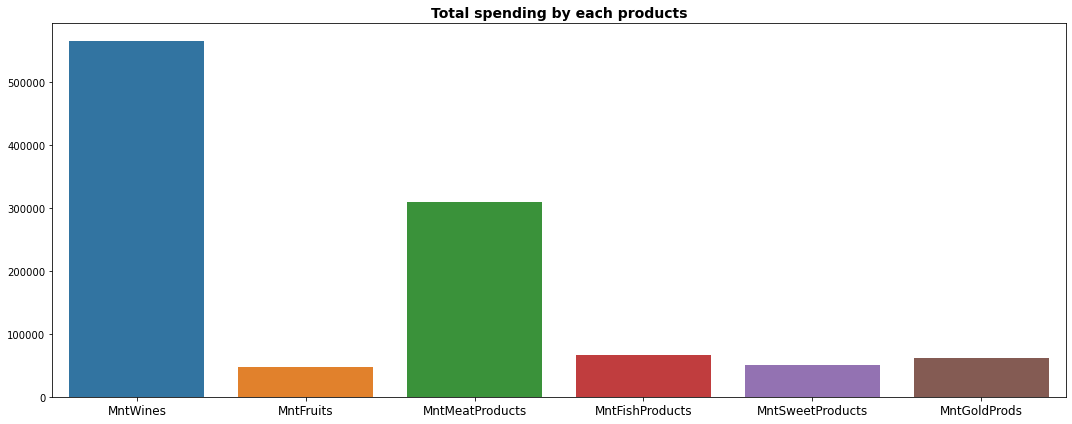

In [26]:
# Total Spending by each products

products =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
products_data = df_non_outlier[products].sum()
plt.figure(figsize=(15,6))
plt.title('Total spending by each products', fontsize = 14, fontweight = 'bold')
x = sns.barplot(x=products, y=products_data.values)
x.set_xticklabels(products, size=12)
plt.tight_layout()

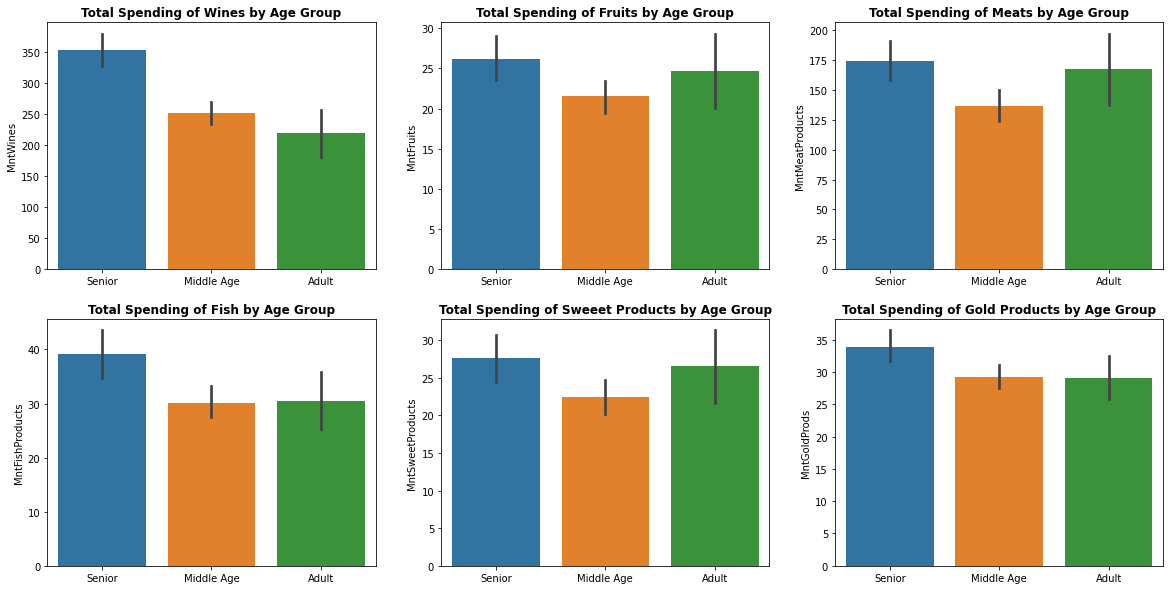

In [27]:
# Spending products by Age Group 
fig, ax=plt.subplots(2,3,figsize=(20,10))
sns.barplot(x='Age_group', y='MntWines', data=df_non_outlier, ax=ax[0][0]);
ax[0][0].set_title('Total Spending of Wines by Age Group', fontsize = 12, fontweight = 'bold')
ax[0][0].set_xlabel('')
sns.barplot(x='Age_group', y='MntFruits', data=df_non_outlier, ax=ax[0][1]);
ax[0][1].set_title('Total Spending of Fruits by Age Group', fontsize = 12, fontweight = 'bold')
ax[0][1].set_xlabel('')
sns.barplot(x='Age_group', y='MntMeatProducts', data=df_non_outlier, ax=ax[0][2]);
ax[0][2].set_title('Total Spending of Meats by Age Group', fontsize = 12, fontweight = 'bold')
ax[0][2].set_xlabel('')
sns.barplot(x='Age_group', y='MntFishProducts', data=df_non_outlier, ax=ax[1][0]);
ax[1][0].set_title('Total Spending of Fish by Age Group', fontsize = 12, fontweight = 'bold')
ax[1][0].set_xlabel('')
sns.barplot(x='Age_group', y='MntSweetProducts', data=df_non_outlier, ax=ax[1][1]);
ax[1][1].set_title('Total Spending of Sweeet Products by Age Group', fontsize = 12, fontweight = 'bold')
ax[1][1].set_xlabel('')
sns.barplot(x='Age_group', y='MntGoldProds', data=df_non_outlier, ax=ax[1][2]);
ax[1][2].set_title('Total Spending of Gold Products by Age Group', fontsize = 12, fontweight = 'bold')
ax[1][2].set_xlabel('');

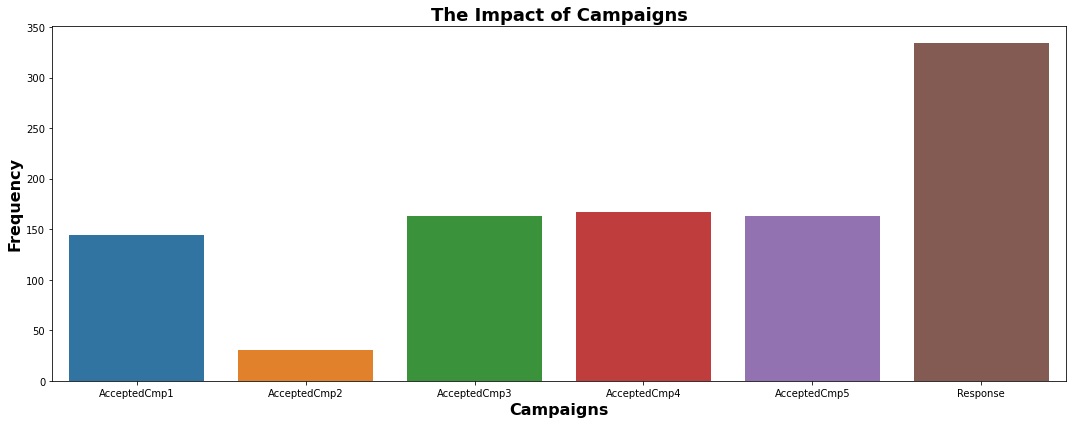

In [29]:
# What is the impact of a campaign?

campaigns = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response']].copy()
cmp_success = campaigns.sum(axis = 0)
plt.figure(figsize=(15,6))
sns.barplot(x = campaigns.columns, y = cmp_success.values)
plt.title('The Impact of Campaigns', fontsize=18, fontweight ="bold")
plt.xlabel('Campaigns', fontsize=16, fontweight ="bold")
plt.ylabel('Frequency', fontsize=16, fontweight ="bold")
plt.tight_layout()

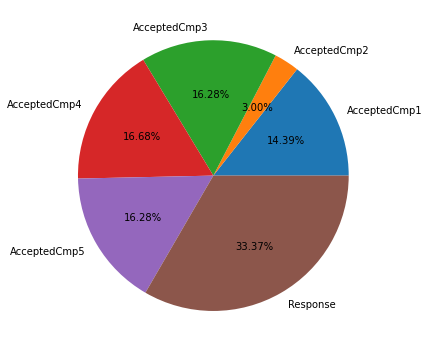

In [30]:
# Percentage the Successful of campaigns
plt.pie(x = cmp_success, labels = campaigns.columns, 
        autopct = '%1.2f%%', shadow = False);
plt.tight_layout()

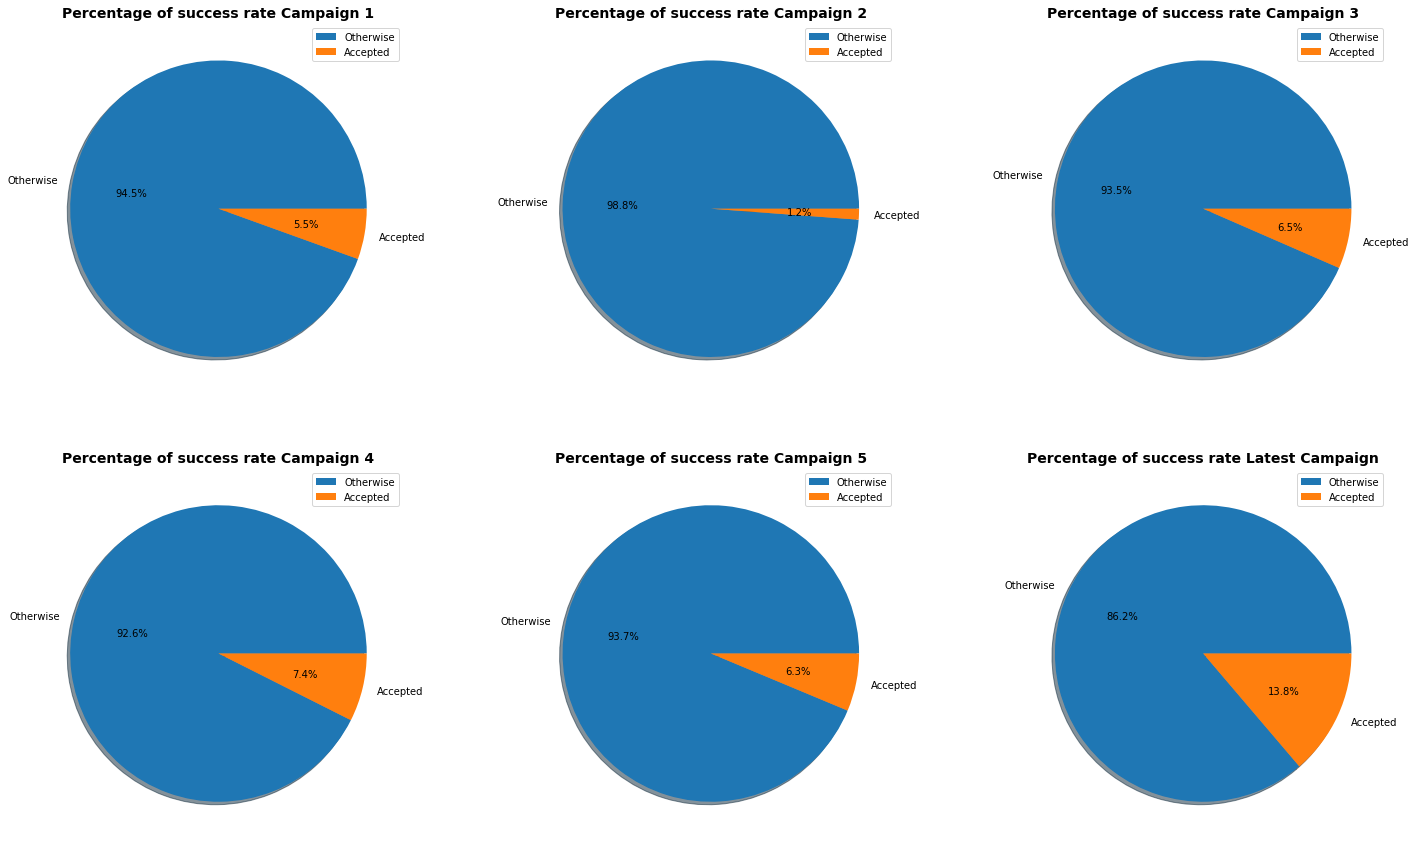

In [30]:
# Percentage of each campaigns 

fig, ax=plt.subplots(2,3,figsize=(25,15))
df_non_outlier['AcceptedCmp1'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[0][0].set_title('Percentage of success rate Campaign 1',fontsize = 14, fontweight ="bold") 
ax[0][0].set_ylabel('')
df_non_outlier['AcceptedCmp2'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[0][1].set_title('Percentage of success rate Campaign 2',fontsize = 14, fontweight ="bold") 
ax[0][1].set_ylabel('')
df_non_outlier['AcceptedCmp3'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][2],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[0][2].set_title('Percentage of success rate Campaign 3',fontsize = 14, fontweight ="bold") 
ax[0][2].set_ylabel('')
df_non_outlier['AcceptedCmp4'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][0],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[1][0].set_title('Percentage of success rate Campaign 4',fontsize = 14, fontweight ="bold") 
ax[1][0].set_ylabel('')
df_non_outlier['AcceptedCmp5'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[1][1].set_title('Percentage of success rate Campaign 5',fontsize = 14, fontweight ="bold") 
ax[1][1].set_ylabel('')
df_non_outlier['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][2],shadow=True,legend=True, labels=['Otherwise', 'Accepted'])
ax[1][2].set_title('Percentage of success rate Latest Campaign',fontsize = 14, fontweight ="bold") 
ax[1][2].set_ylabel('');

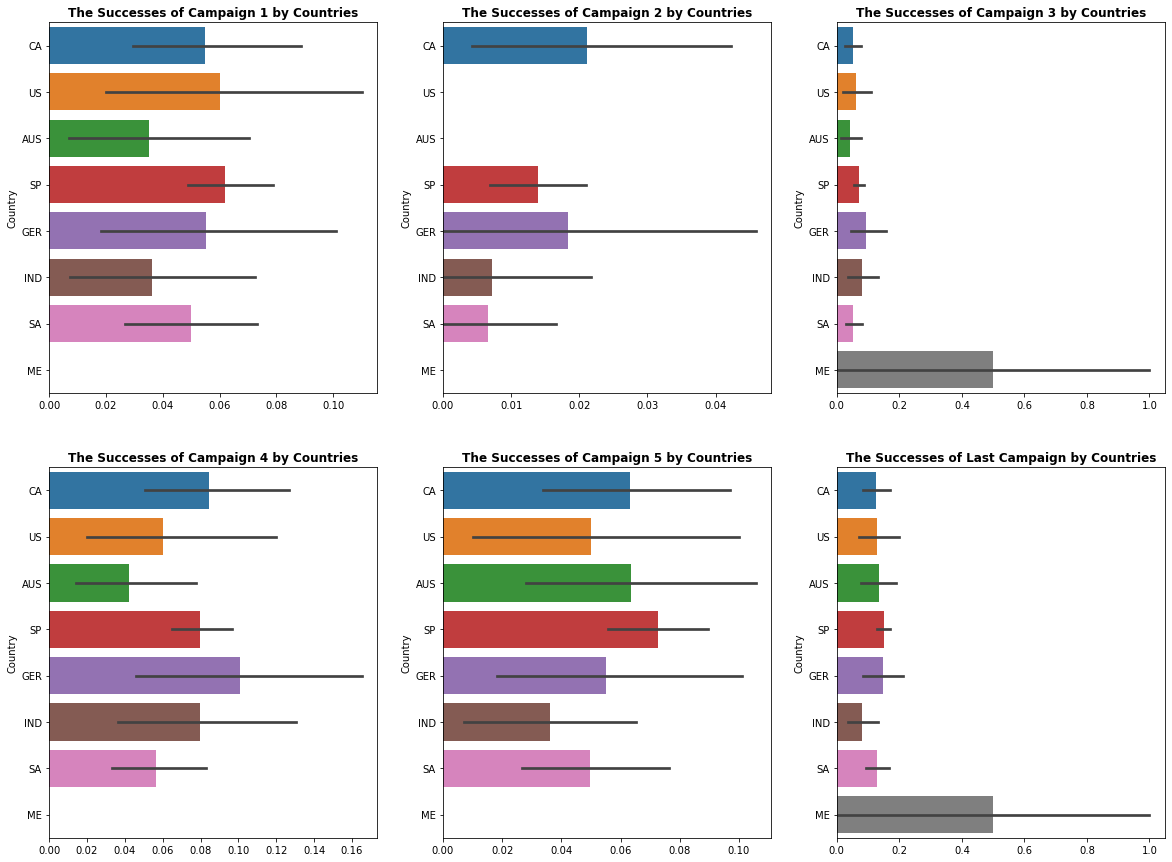

In [31]:
#The Success of Campaigns by each Countries

fig, ax = plt.subplots(2,3,figsize=(20,15))
sns.barplot(x='AcceptedCmp1', y='Country', data=df_non_outlier, ax=ax[0][0]);
ax[0][0].set_title('The Successes of Campaign 1 by Countries', fontweight='bold')
ax[0][0].set_xlabel('')
sns.barplot(x='AcceptedCmp2', y='Country', data=df_non_outlier, ax=ax[0][1]);
ax[0][1].set_title('The Successes of Campaign 2 by Countries', fontweight='bold')
ax[0][1].set_xlabel('')
sns.barplot(x='AcceptedCmp3', y='Country', data=df_non_outlier, ax=ax[0][2]);
ax[0][2].set_title('The Successes of Campaign 3 by Countries', fontweight='bold')
ax[0][2].set_xlabel('')
sns.barplot(x='AcceptedCmp4', y='Country', data=df_non_outlier, ax=ax[1][0]);
ax[1][0].set_title('The Successes of Campaign 4 by Countries', fontweight='bold')
ax[1][0].set_xlabel('')
sns.barplot(x='AcceptedCmp5', y='Country', data=df_non_outlier, ax=ax[1][1]);
ax[1][1].set_title('The Successes of Campaign 5 by Countries', fontweight='bold')
ax[1][1].set_xlabel('')
sns.barplot(x='Response', y='Country', data=df_non_outlier, ax=ax[1][2]);
ax[1][2].set_title('The Successes of Last Campaign by Countries', fontweight='bold')
ax[1][2].set_xlabel('');

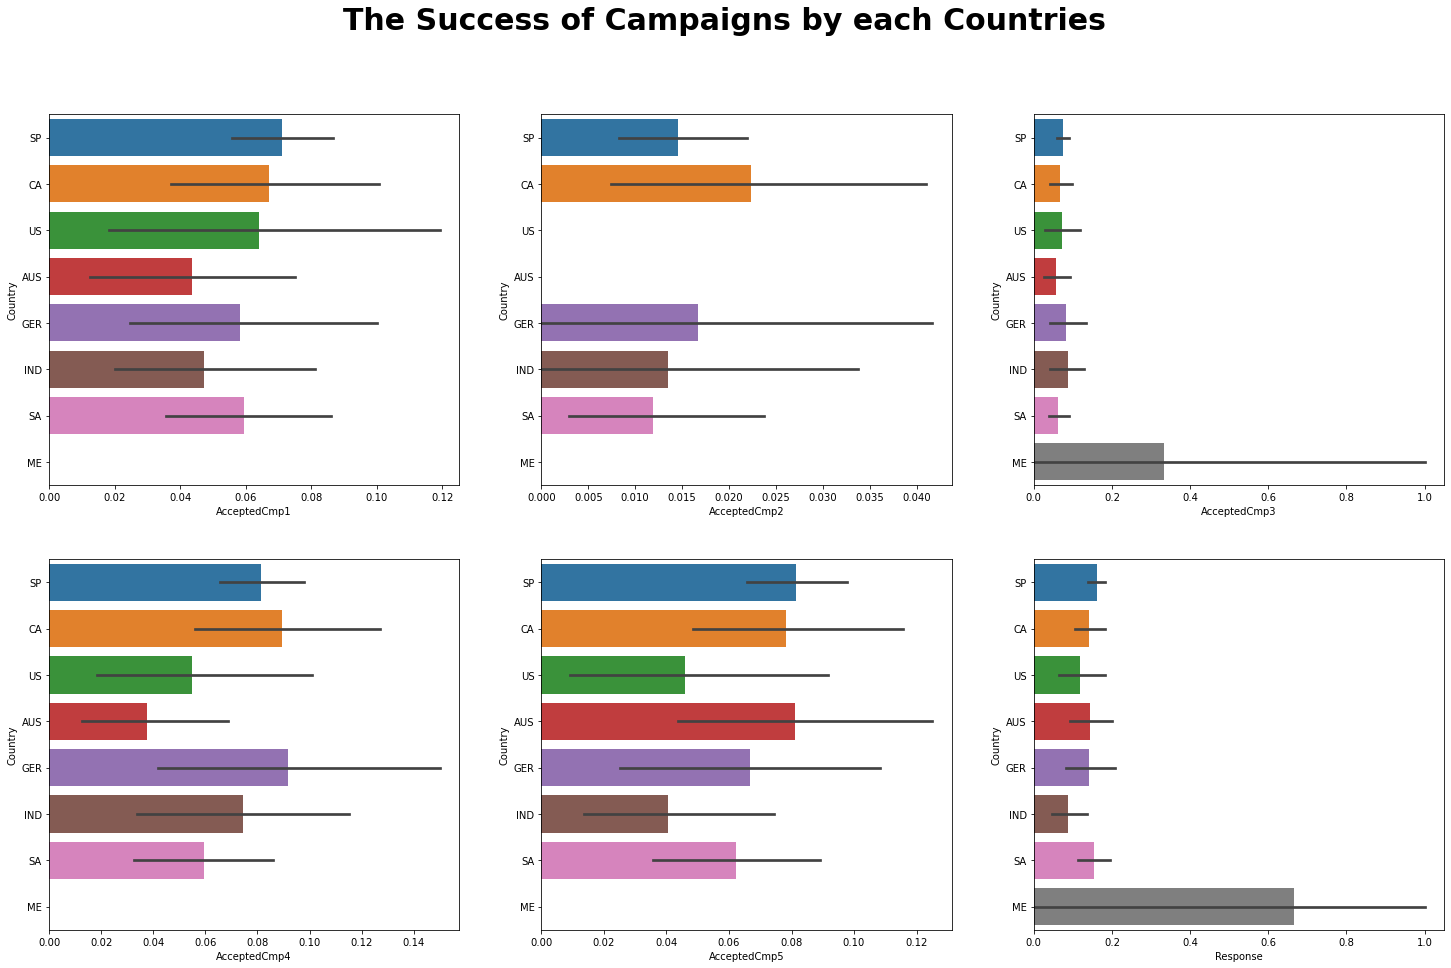

In [47]:
# The simple code for the previous analysis
fig=plt.subplots(figsize=(25, 15))

for i, feature in enumerate(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']):
    plt.subplot(2, 3, i+1)
    sns.barplot(df[feature], df['Country'])
    plt.suptitle('The Success of Campaigns by each Countries',fontsize = 30, fontweight ="bold")

# Statistical Analysis

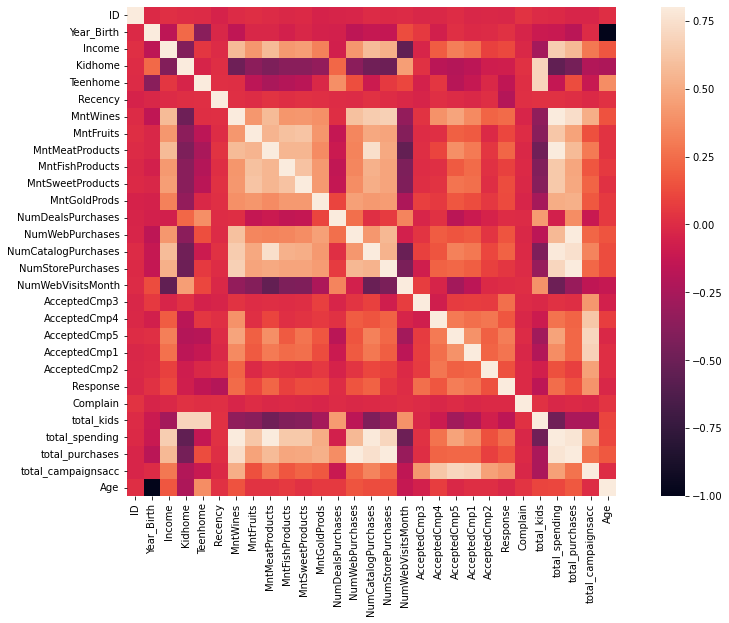

In [32]:
# Correlations Analysis
corrmat = df_non_outlier.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<AxesSubplot:>

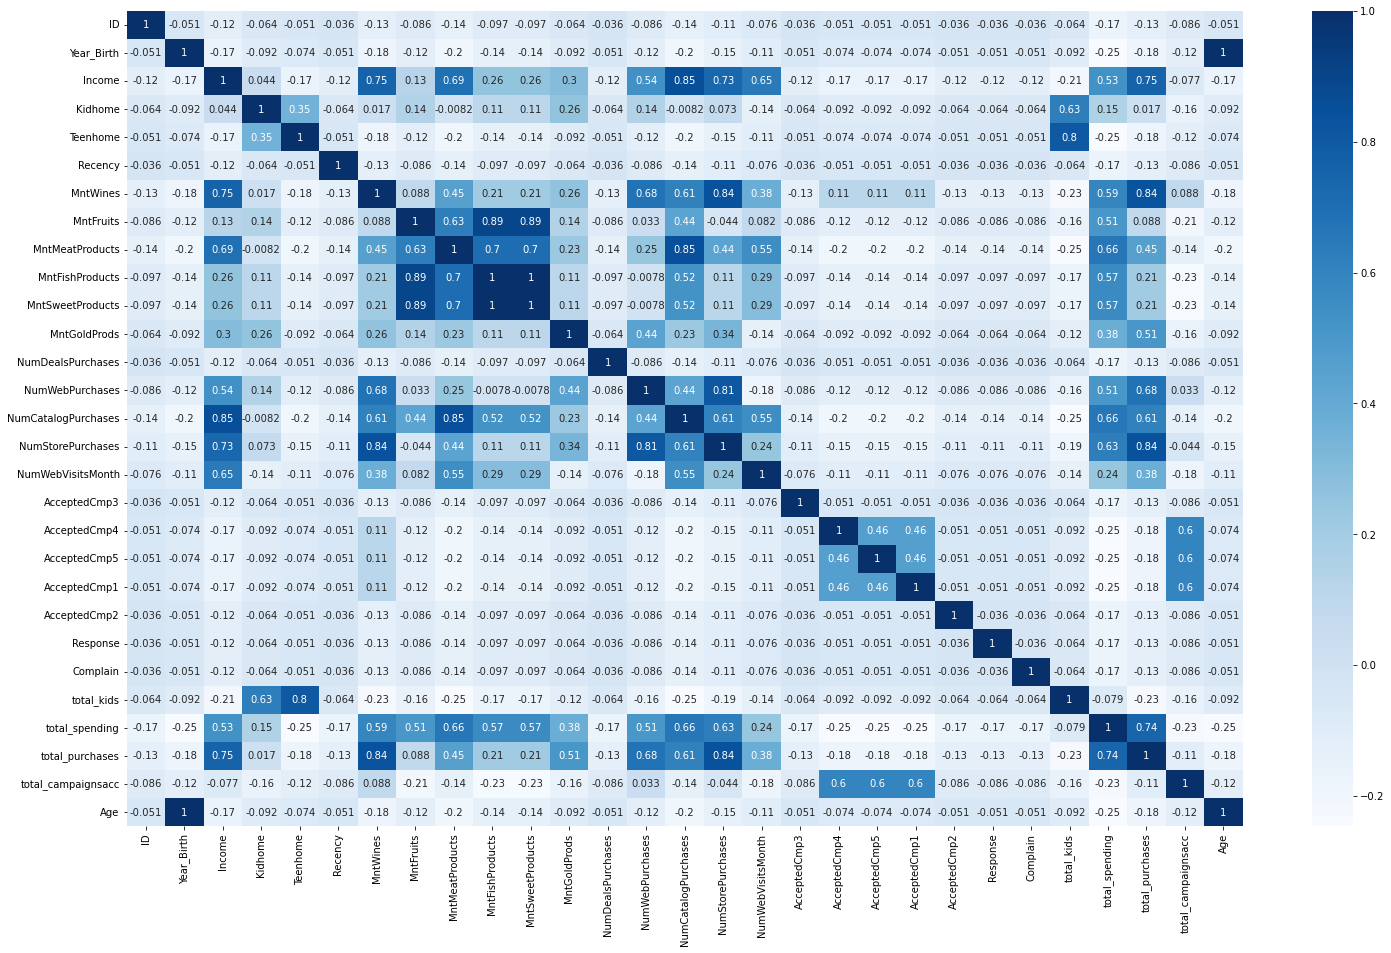

In [33]:
df_non_outlier_map = abs(df_non_outlier.corr())>0.5
plt.figure(figsize=(25,15))
sns.heatmap(df_non_outlier_map.corr(),annot=True,cmap='Blues')

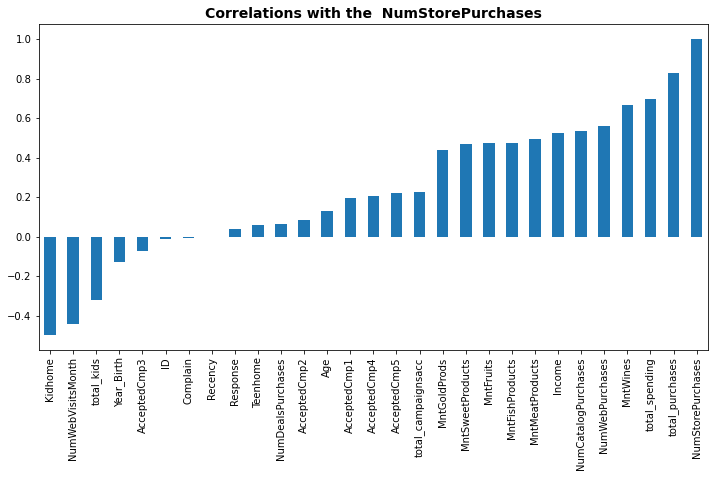

In [33]:
# Correlations with the  NumStorePurchases

corr_with_store = df_non_outlier.corr()
plot_data = corr_with_store["NumStorePurchases"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the  NumStorePurchases"
          ,fontsize = 14, fontweight ="bold")
plt.show()

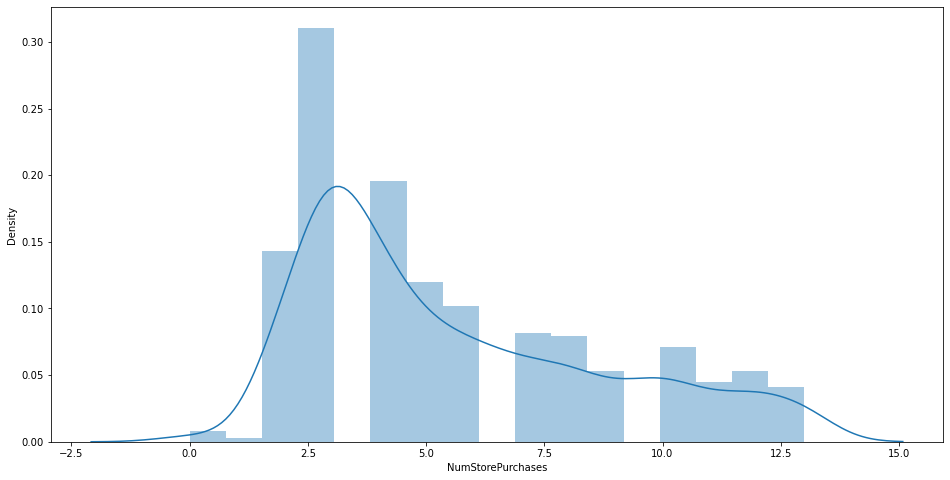

In [35]:
# Normality Check
plt.figure(figsize=(16,8))
sns.distplot(df_non_outlier['NumStorePurchases'])
plt.show()

In [36]:
# Transofrming categorical Data
categorical_data = df.select_dtypes(include=['object'])
categorical_data.columns

Index(['Education', 'Marital_Status', 'Country', 'year', 'month', 'Age_group'], dtype='object')

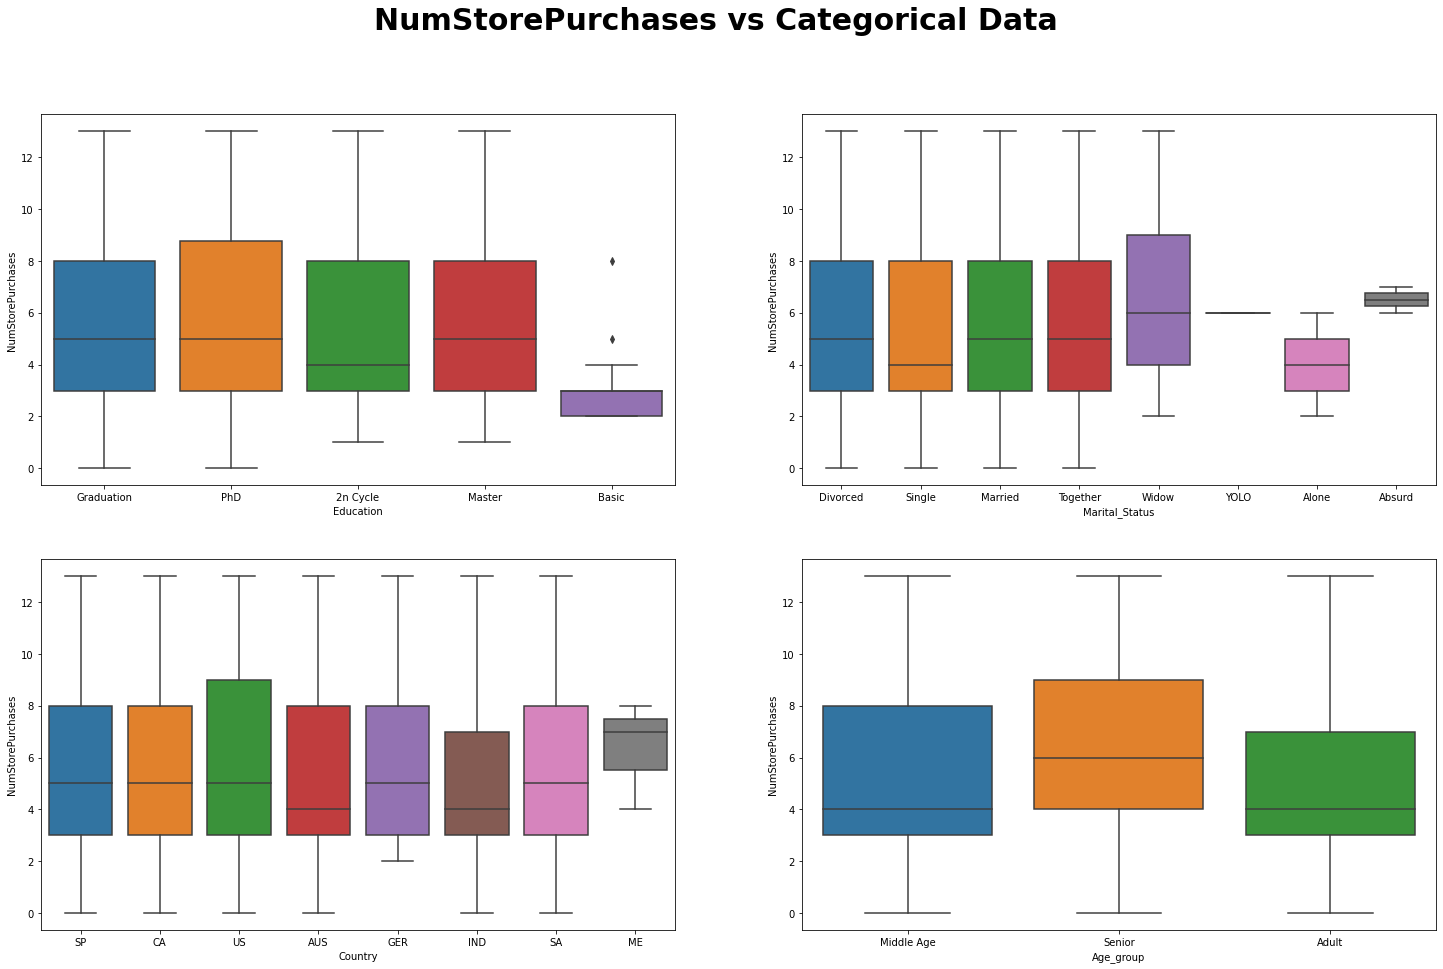

In [48]:
fig, ax=plt.subplots(figsize=(25,15))
i=0
for feature in categorical_data.columns:
    if feature not in ['year', 'month']:
        i+=1
        plt.subplot(2, 2, i)
        sns.boxplot(df[feature],df['NumStorePurchases'])
        plt.suptitle('NumStorePurchases vs Categorical Data',fontsize = 30, fontweight ="bold")